## US Visa Approval Prediction Project

### About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

1) Problem statement.
* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

The dataset is taken from kaggle website - https://www.kaggle.com/datasets/moro23/easyvisa-dataset

### Exploratory Data Analysis

In [1]:
# importing all libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# importing the data

df = pd.read_csv("Visa_dataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

Summary statistics of the data

In [4]:
# statistics for numerical columns 

df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


* The min value of number of employees need to be taken care of as it is negative value.
* Min value of year of establishment is 1800 which could be a potential outlier for the data.
* Check the range of wages and for outliter.

In [5]:
# checking basic info of the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There is no missing values in the dataset
* Most of the features are of type object with four of them being float type


For easy data exploration 

-> We will split the features into numerical and categorical features. 


In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# printing the features
print(f"There are {len(numerical_features)} numerical features in the dataset: {numerical_features}")
print(f"There are {len(categorical_features)} categorical features in the dataset: {categorical_features}")

There are 3 numerical features in the dataset: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
There are 9 categorical features in the dataset: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# proportion of data for each category for categorical features

for col in categorical_features:
    # skipping case_id column as it doesn't make sense
    if col != 'case_id':      
        print(df[col].value_counts(normalize=True) * 100)
        print("\n")

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64


education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64


has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64


requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64


region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64


unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64


full_time_position
Y    89.375981
N    10.624019
Name: proportion, dtype: float64


case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: flo

**Insights:**

* 66% of Visa applications are granted, only 33% were rejected. Data is not much imbalanced.
* Continent column is highly biased towards Asia, we can check whether to combine other continents into single category or couple of categories.
* Unit of Wage seems to important feature as most of applications are in yearly salaries. 

### Univariate Analysis 

It is performed to understand the distribution and statistical properties of a single variable / feature. 

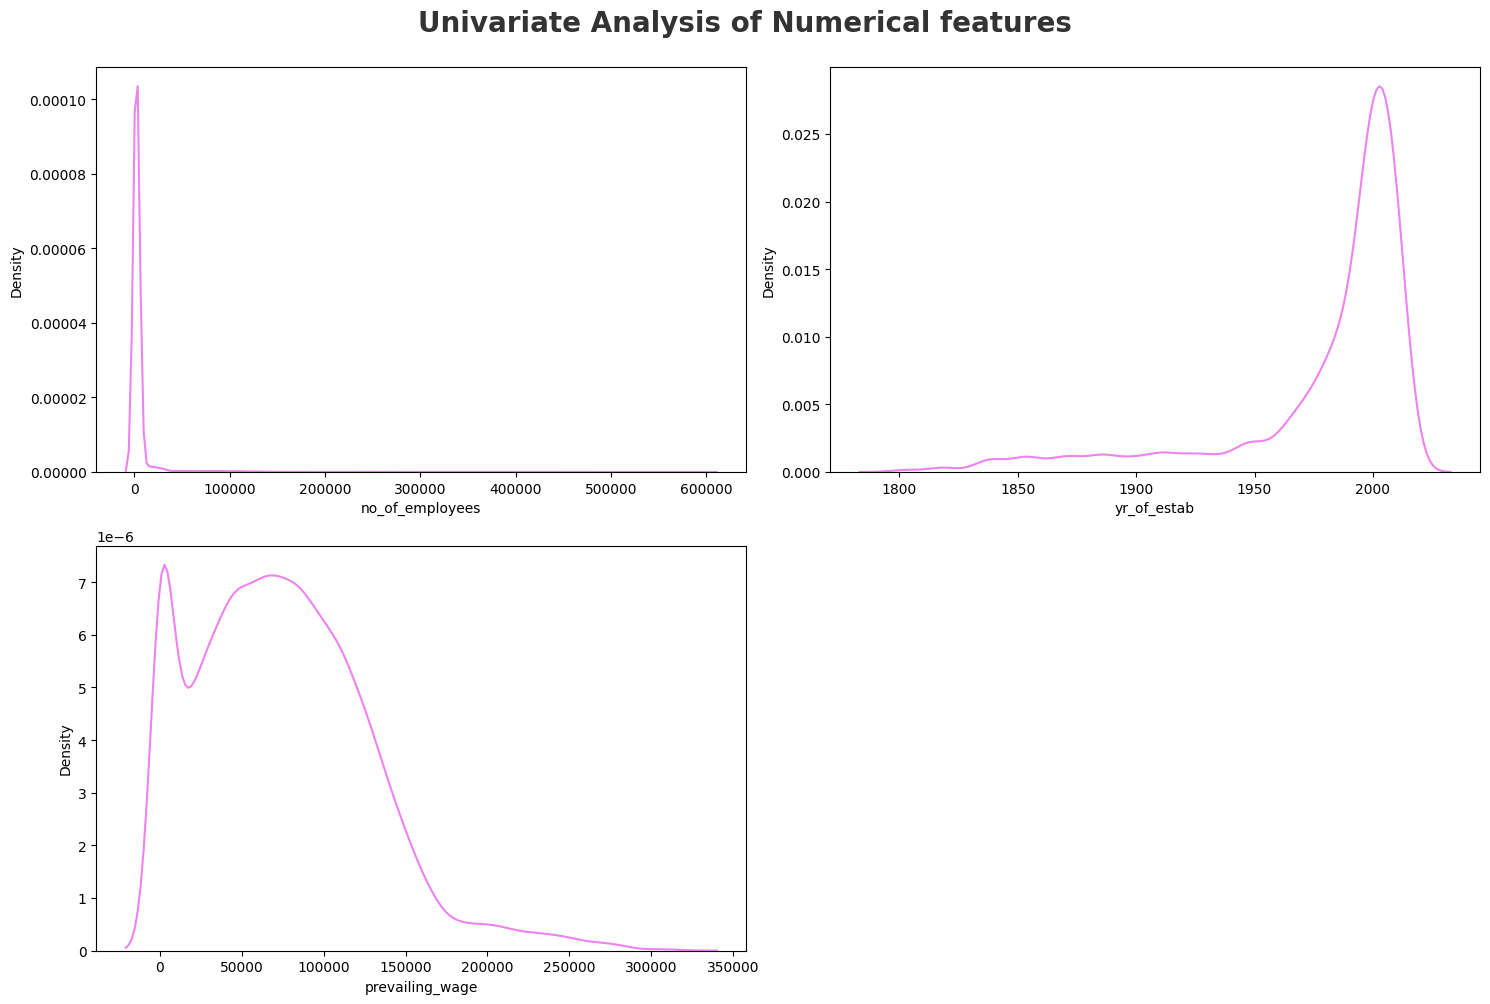

In [8]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, feature in enumerate(numerical_features):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=df[feature], color="violet")
    plt.xlabel(feature)
    plt.tight_layout()

**Insights:**

* `no_of_employees` column looks heavily skewed but it may be because of outliers as most of company's headcount is smaller.
* `yr_of_estab` is a discrete feature.
* `privailing-wage` is a right-skewed distribution.

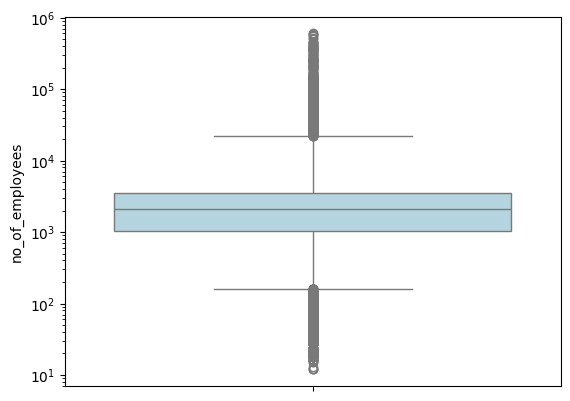

In [9]:
# checking outliers in Number of Employees feature 

sns.boxplot(y="no_of_employees", data=df, color='lightblue', log_scale=True)
plt.show()

> Most of the applications come from mid-level companies or mid-level startups and there are much more outliers which cannot be excluded from analysis.

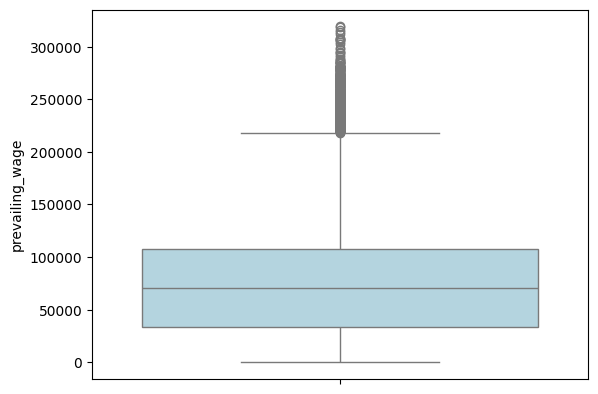

In [10]:
# checking outliers in Prevailing Wages feature 

sns.boxplot(y="prevailing_wage", data=df, color='lightblue')
plt.show()

> There are some applications with yearly wages more than $220K salary and could be potentail outliers but considering them for the model is a good option.

#### Categorical features

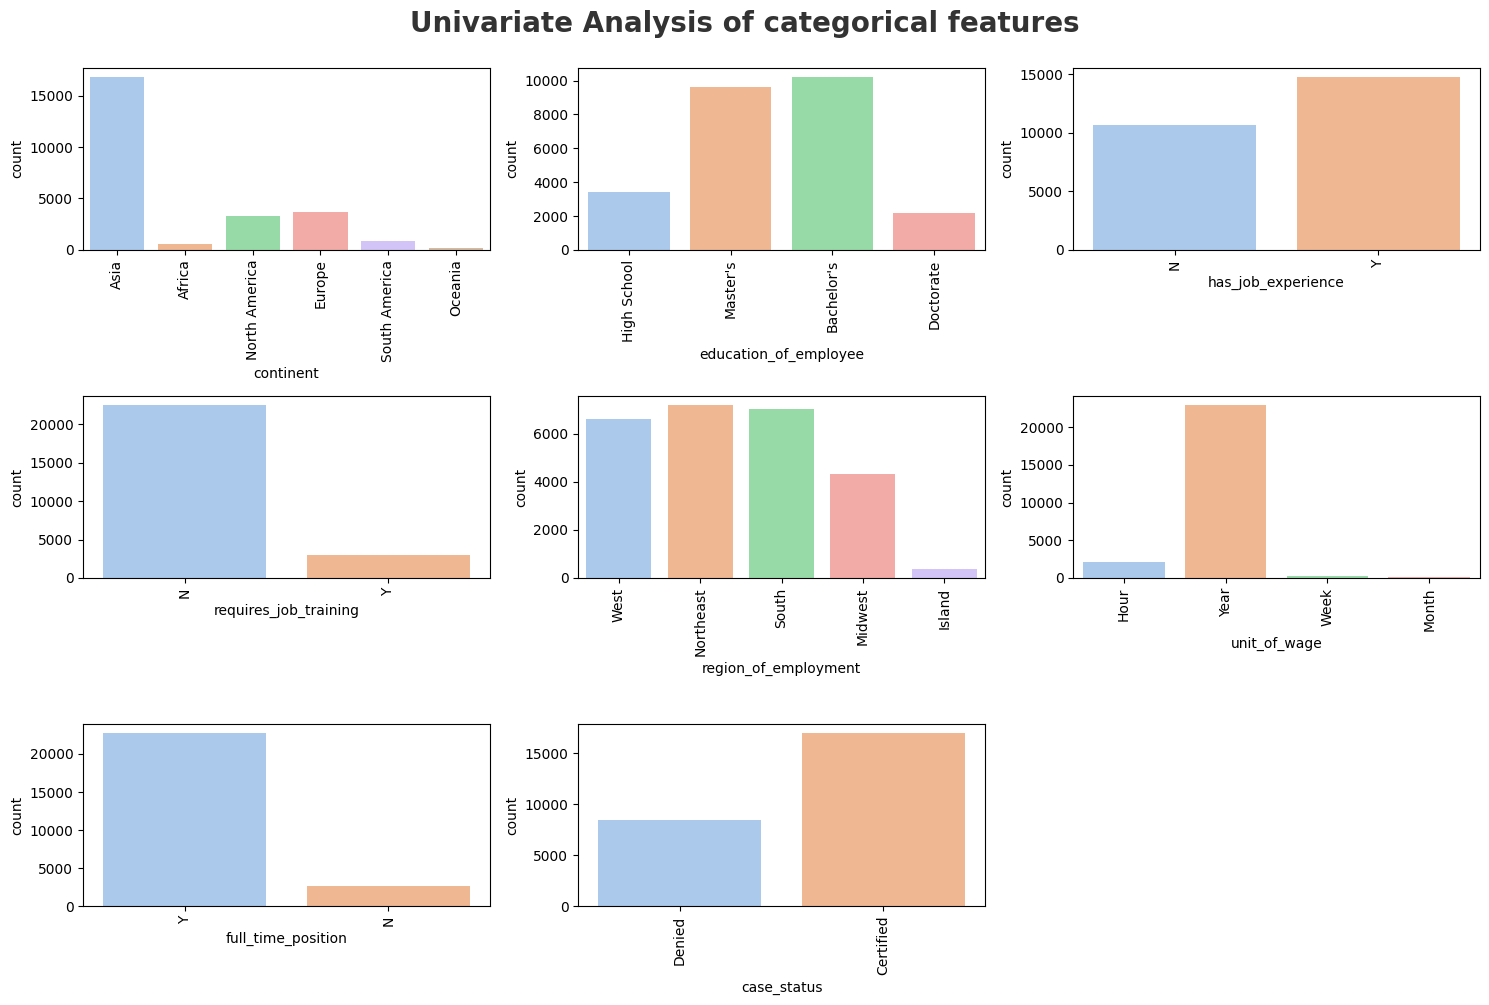

In [11]:
categorical_features.remove("case_id") # removing unwanted feature

plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of categorical features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, feature in enumerate(categorical_features):
    plt.subplot(3,3, i+1)
    sns.countplot(x=df[feature], palette="pastel")
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.tight_layout()

**Insights:**

* In continent feature, Asia category is dominating than others
* In Unit of wage feature, yearly wages has more samples than other categories.

#### Checking Multi-collinearity in Numerical features

Out of three numerical features, the year_of_establishment feature can be excluded from checking multicollinearity as it is a discrete variable. 

In [12]:
df[["prevailing_wage", "no_of_employees"]].corr()

,prevailing_wage,no_of_employees
prevailing_wage,1.000000,-0.009523
no_of_employees,-0.009523,1.000000


> There is no multicollinearity between numerical variables

#### Checking Multi-collinearity in Categorical features

Since our target feature is binary categorical variable and we have 8 others categorical features, chi-square test could be one of test to test the independence between categorical feature and target variable.

* A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

* A chi-square statistic is one way to show a relationship between two categorical variables.

1) Null Hypothesis: The Feature is independent of target column (No-Correlation)

2) Alternative Hypothesis: The Feature and Target column are not independent (Correlation)

In [13]:
from scipy.stats import chi2_contingency 

chi_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df["case_status"], df[feature]))[1] < 0.05:   # checking p-value
        chi_test.append("Reject Null Hyposthesis")
    else:
        chi_test.append("Failed to Reject Null Hyposthesis")

chi_test_results = pd.DataFrame({"features": categorical_features, "chi_test_result": chi_test})
chi_test_results

,features,chi_test_result
0,continent,Reject Null Hyposthesis
1,education_of_employee,Reject Null Hyposthesis
2,has_job_experience,Reject Null Hyposthesis
3,requires_job_training,Failed to Reject Null Hyposthesis
4,region_of_employment,Reject Null Hyposthesis
5,unit_of_wage,Reject Null Hyposthesis
6,full_time_position,Reject Null Hyposthesis
7,case_status,Reject Null Hyposthesis


**Insights:**

* All categorical features are in correlation with target variable except for `requires_job_training` feature which is uncorrelated.

#### Checking missing values in the dataset

In [14]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### checking outliers and distribution of numerical features with respect to target variable

In [15]:
continuous_features = [feature for feature in numerical_features if df[feature].nunique() > 10]
continuous_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

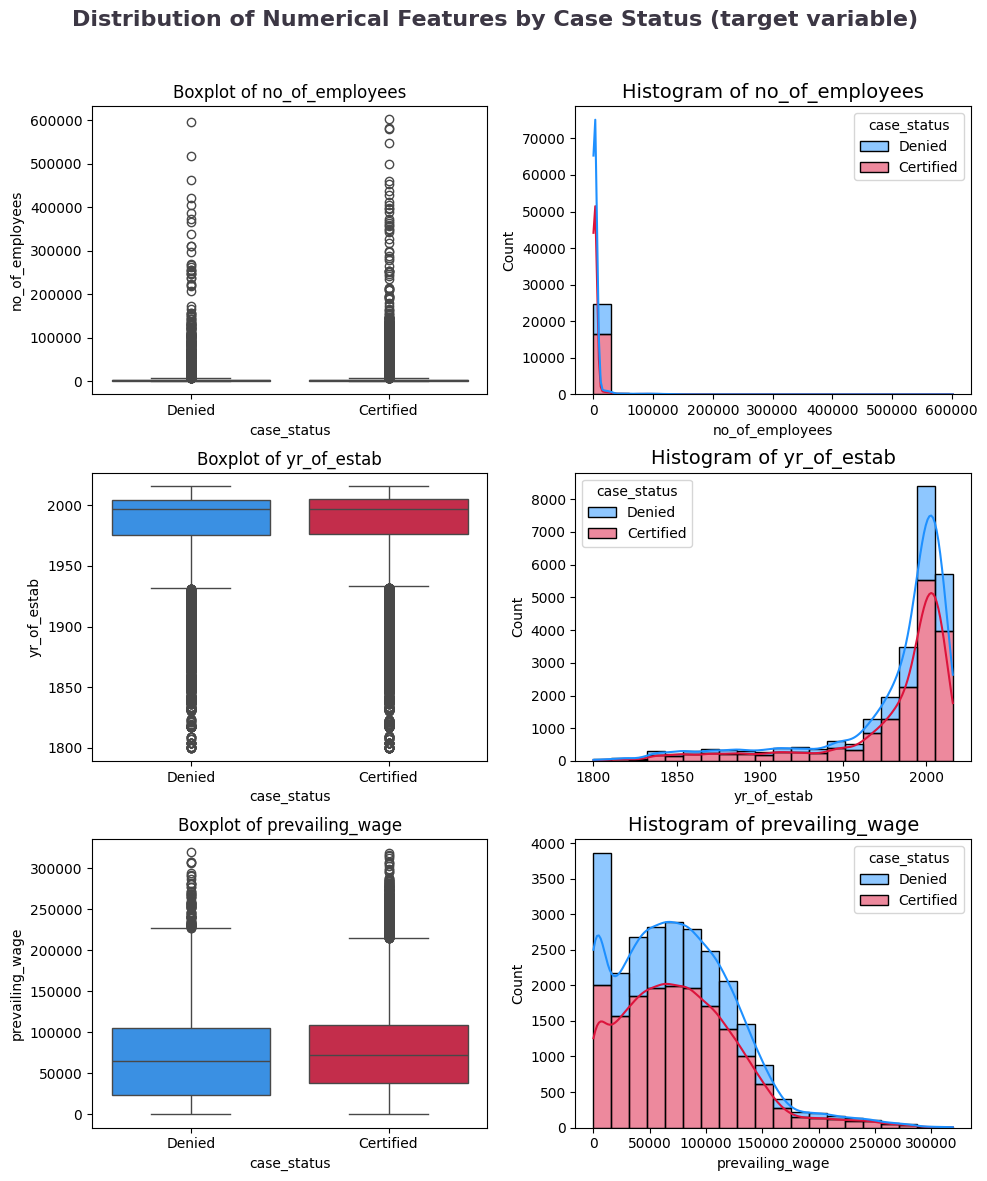

In [16]:
# setting multiple colors for the palette
clr1 = ['#1E90FF', '#DC143C']

fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features by Case Status (target variable)', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')

for i, col in enumerate(continuous_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)


> The distribution of numerical feature for the both classes of target variable is more over the same. So we need not act on it.

### Initial Analysis Insights 

* No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
* `yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.
* `prevailing_wage` is right skewed with outliers above upper bound of box plot.
* There are No missing values in the dataset.
* The `case_id` column can be deleted because each row has unique values.
* The `case_status` column is the target to predict.
* In the Categorical column, some features can be made Binary categories or fewer categories in feature Encoding

### Analysis of features with respect to Target variable

Let's visualize the target variable

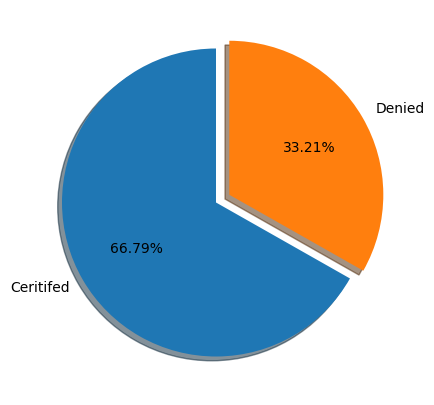

In [17]:
percentages = df["case_status"].value_counts(normalize=True) * 100
labels = ["Ceritifed", "Denied"]

#plotting pie chart for target variable 
fig, ax = plt.subplots(figsize=(10,5))
explode = [0, 0.1]
ax.pie(percentages, labels=labels, startangle=90, explode=explode, autopct='%1.2f%%',
       shadow=True)
plt.show()

In [18]:
# creating a copy of the dataset 

df2 = df.copy()

#### 1) Does applicant's continent has any impact on visa status?

In [19]:
df.groupby("continent")["case_status"].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

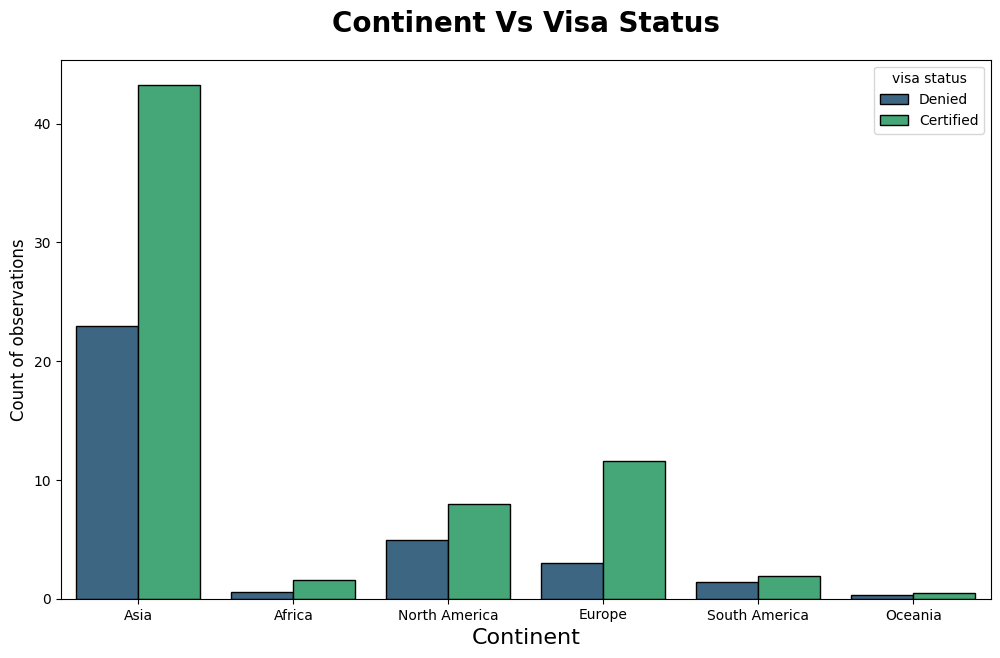

In [20]:
# let's visualize it  

plt.figure(figsize=(12,7))
sns.countplot(data=df, x="continent", hue="case_status", stat="percent", ec="black", palette="viridis")
plt.title("Continent Vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Continent", fontsize=16)
plt.ylabel("Count of observations", fontsize=12)
plt.legend(title="visa status", fancybox=True)

* `Europe` and `Asia` has less denila rate compared to other countries.
* Most of the applications are from `Asia` followed by `Europe`
* Other countries has same split ratio as of full data distribution.

### 2) Does applicant's education has any impact on Visa status ?

In [21]:
df.groupby("education_of_employee")["case_status"].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

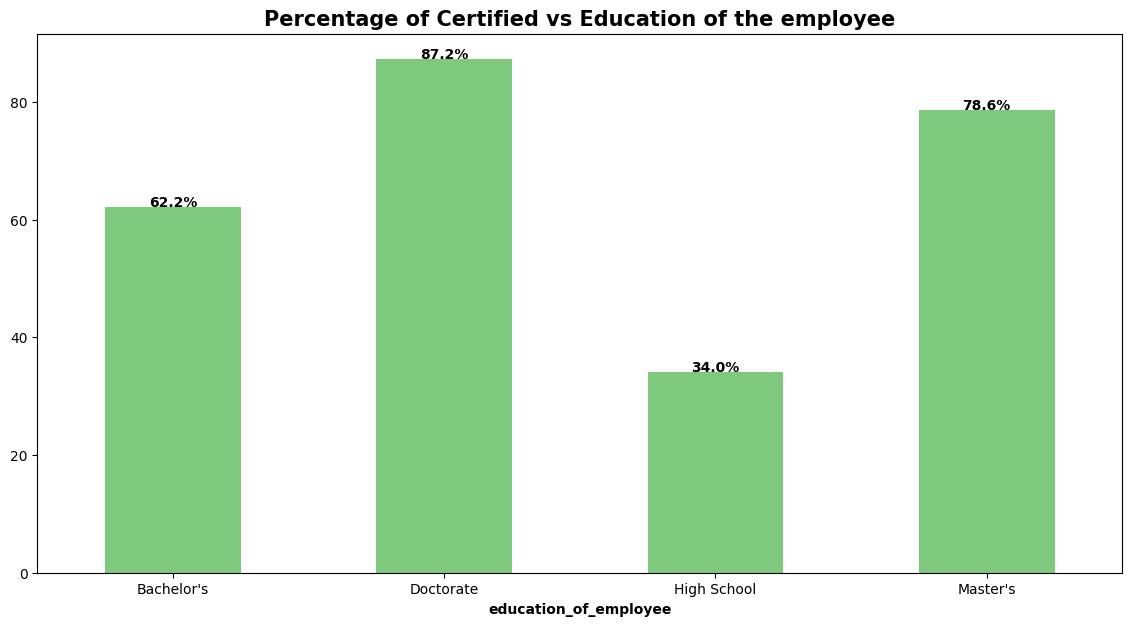

In [22]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts() / df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold')

# to put the text on top of bars
categories_values = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(categories_values.shape[0]):
    count = categories_values[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,weight='bold',ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

* Education status is important feature for target
* Applications with `master's` and `Doctorate` degree have more chances of getting visa approved.

### 3) Does applicant's Previous Work experience has any impact on Visa status ?

In [23]:
df.groupby("has_job_experience")["case_status"].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

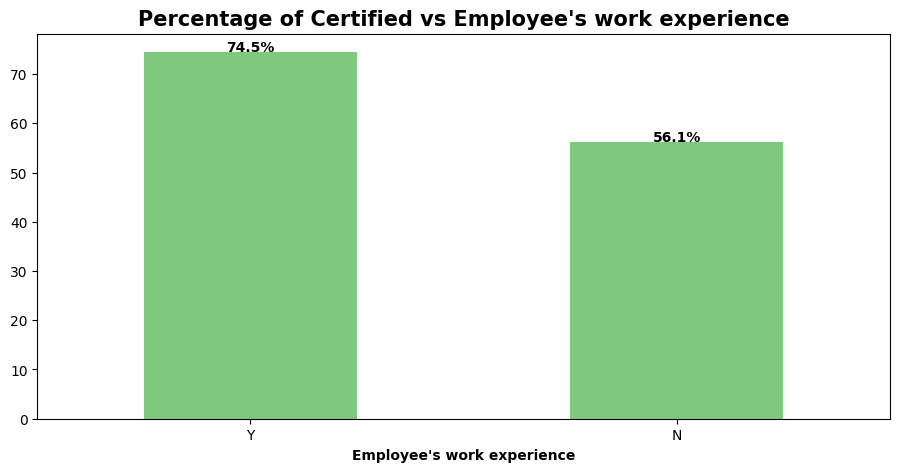

In [24]:
plt.figure(figsize=[11,5])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts() / df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Employee's work experience" , fontsize = 15, fontweight ='bold')

# to put the text on top of bars
categories_values = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(categories_values.shape[0]):
    count = categories_values[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,weight='bold',ha='center')

plt.xlabel("Employee's work experience" , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights:**

* People with previous work experience has been certified 74.5%. Only 25.5% applicant has been denied.
* People with No previous work experience has been certified 56% and denied 43%.
* This means work experience has effect on Visa status.
* There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge as skills and knowledge could be more important as well.

### 4) If the Employee requires job training, does it make any impact on visa status?

In [25]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

**Insights:**

* Job Training doesn't have much impact on visa status.
* 67% of people who doesn't need job training got visa certified.
* As we checked in Chi-Squared test, this feature doesn't have much impact on target variable which is confirmed by above stats.

### 5) Does Number of employees of employer for the applicant has any impact on Visa status?

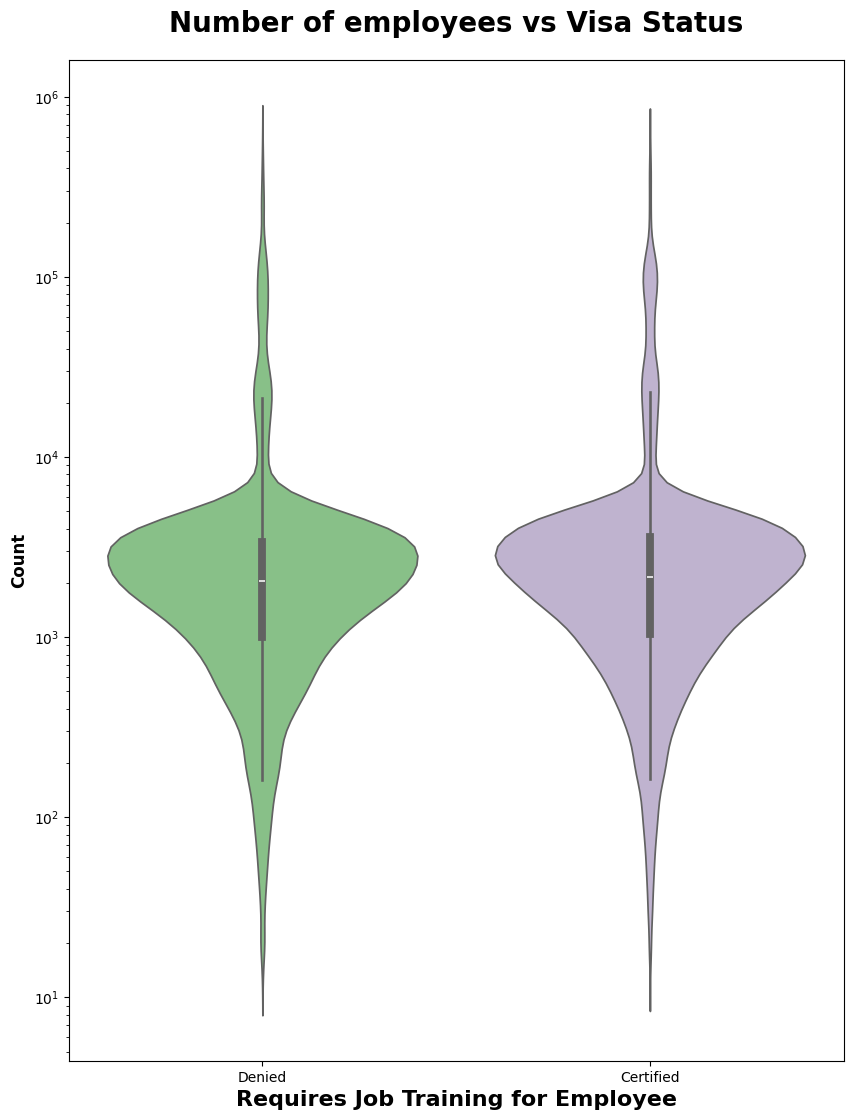

In [27]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent", log_scale=True)
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

> The distrubution of both is similar. But there are outliers in both the classes which need to be handled in feature engineering.

### 6) Does Wages for the applicant has any impact on Visa status?

In [28]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

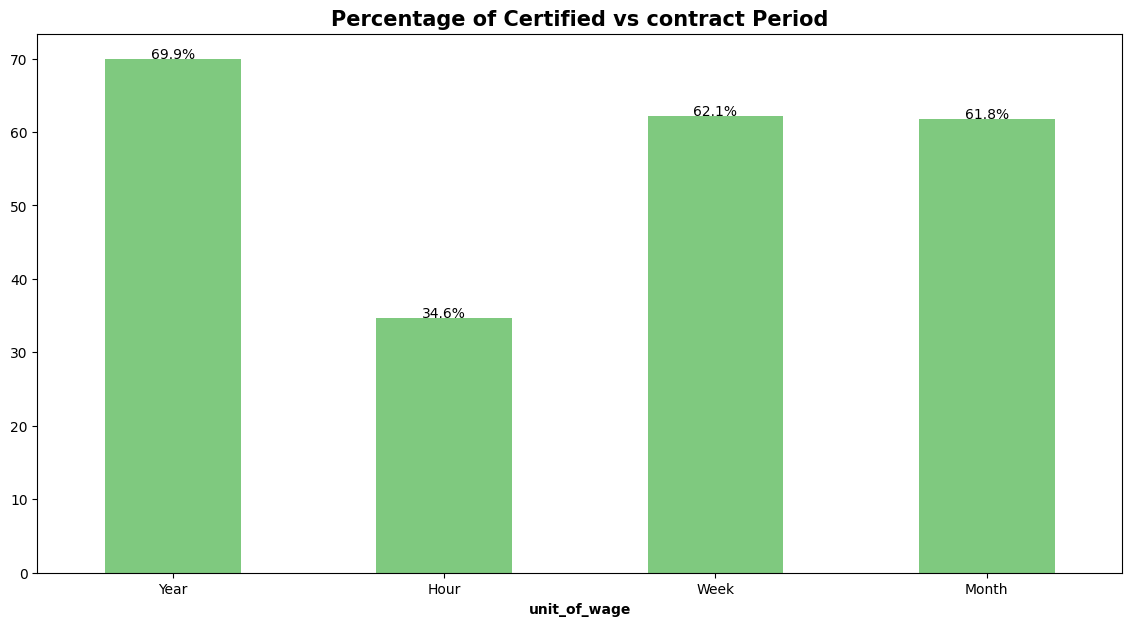

In [30]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract Period" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights:**

* For employees who applied for hourly pay, 65% of them were denied.
* Application with yealy wages were accepted for 69% and denied for 31% most of the time.
* There is a higher chances of approval for yearly contract followed by weekly and monthlu contract.

### 7) Does Region of employment of the applicant's company has any impact on Visa status?

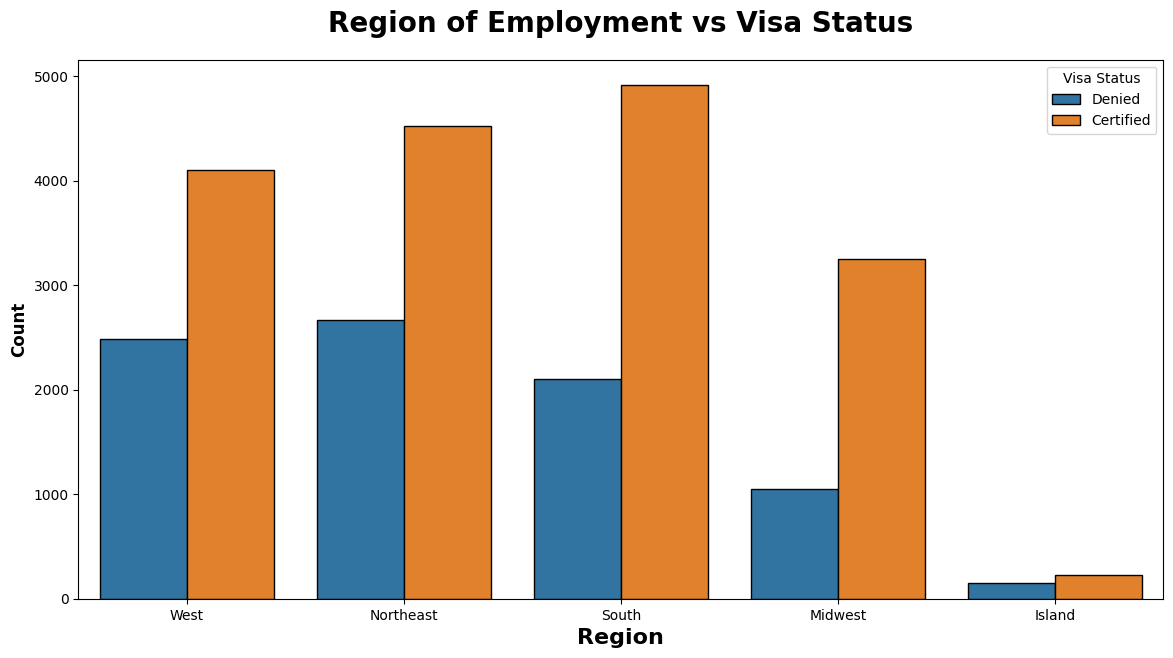

In [31]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

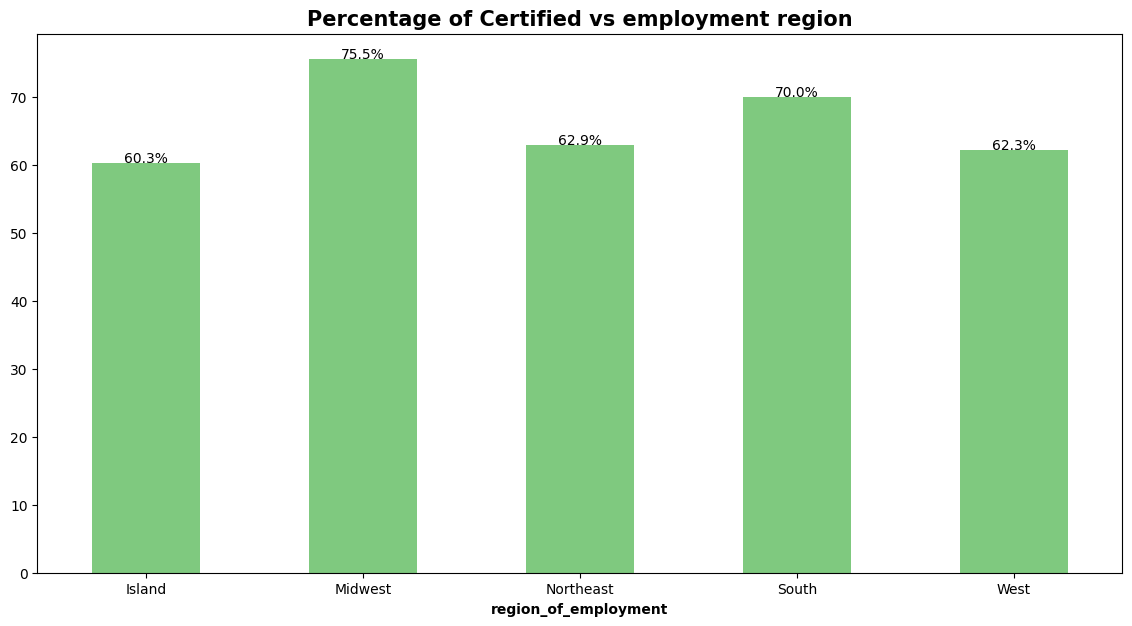

In [32]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights:**

* As per above chart, all the regions have very similar pattern of getting Visa certified and Denied.
* There is a slight edge for Midwest region followed by South region

### 8) Does Prevailing wage has any impact on Visa status ?

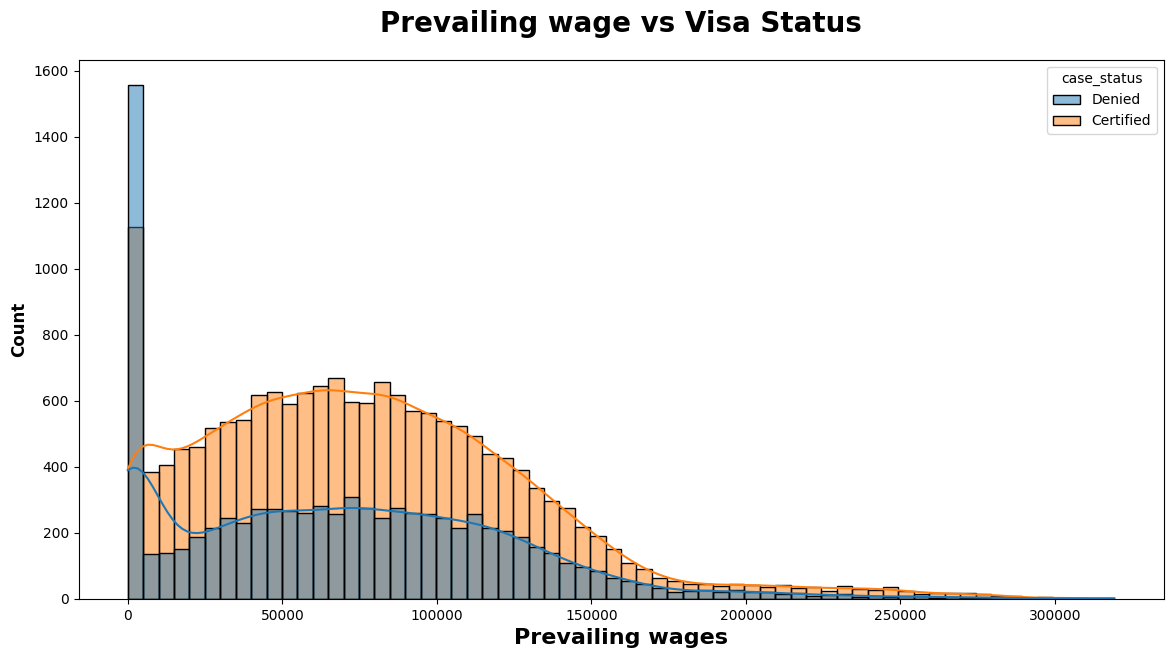

In [34]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing wages", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

> The distribution of both the classes are similar but need to handle the outliers.

### 9) Does Year of establishment of the applicant's company has any impact on Visa status?

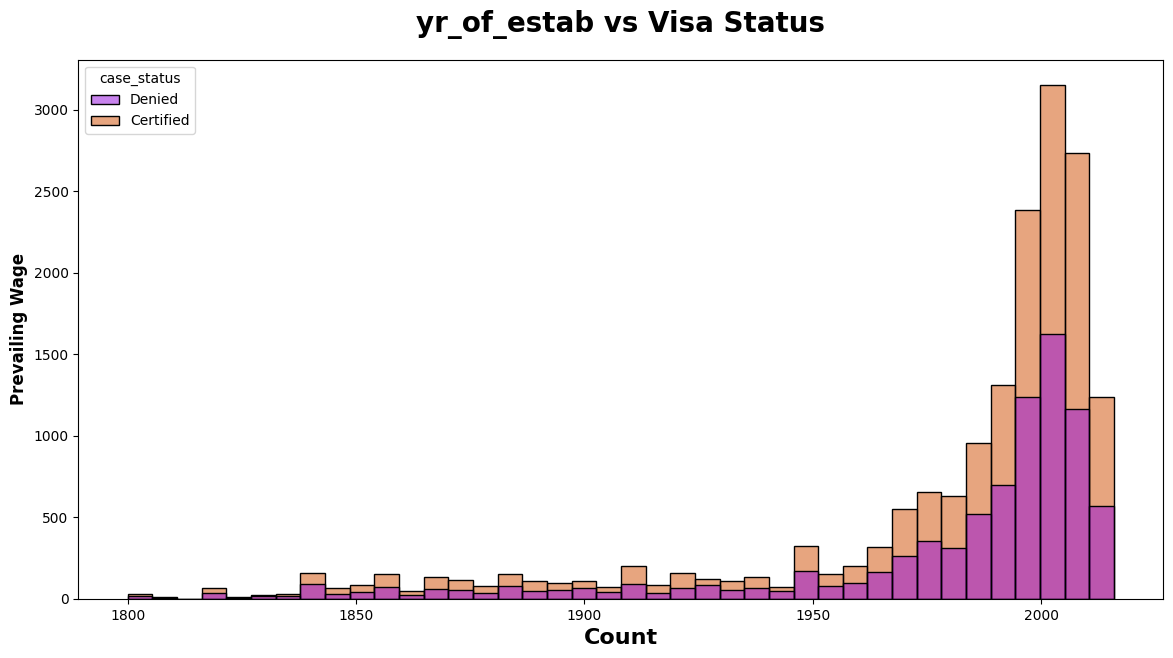

In [38]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Count", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

* Many companies were established after year 1980's.
* The most company establishment happened in year 2000-2005.

#### Additional Insights

In [36]:
df.groupby("continent")["prevailing_wage"].mean().to_frame().sort_values(ascending=False, by="prevailing_wage")

,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


> Average salary of applicants from Asia has higher salaries compared to other countries followed by Africa and Oceania.

### Final Report

* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as others
* Target column `case_status` is imbalanced can be handled before model building.